In [1]:
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd

df = pd.read_csv ('combined_dataset_daily_TSLA_AAPL.csv')
df

,dt,TSLA_Open,TSLA_High,TSLA_Low,TSLA_Close,TSLA_AdjClose,TSLA_Volume,AAPL_Open,AAPL_High,AAPL_Low,...,DGS6MO,DGS10,BAMLH0A0HYM2,VXIBMCLS,USEPUINDXD,DCOILWTICO,TSLA_EPS_diluted,AAPL_EPS_diluted,TSLA_P/E,AAPL_P/E
0,2012-11-05,5.960000,6.316000,5.866000,6.300000,6.300000,10244500.0,20.840000,20.991785,20.628571,...,0.15,1.72,5.57,19.64,225.43,85.64,-0.7440,1.5772,-8.467742,13.238198
1,2012-11-06,6.122000,6.240000,5.990000,6.230000,6.230000,11620000.0,21.079643,21.097857,20.717501,...,0.15,1.78,5.49,19.60,195.50,88.62,-0.7440,1.5772,-8.373656,13.198117
2,2012-11-07,6.200000,6.410000,6.162000,6.308000,6.308000,8572500.0,20.494286,20.519285,19.848213,...,0.14,1.68,5.63,20.49,358.00,84.50,-0.7440,1.5772,-8.478495,12.635412
3,2012-11-08,6.202000,6.376000,6.188000,6.262000,6.262000,6370000.0,20.022499,20.079643,19.117500,...,0.15,1.62,5.67,20.85,241.14,85.07,-0.7440,1.5772,-8.416667,12.176868
4,2012-11-09,6.120000,6.186000,5.970000,6.064000,6.064000,4315000.0,19.300714,19.817142,19.061428,...,0.15,1.61,5.77,20.82,278.07,86.08,-0.7440,1.5772,-8.150538,12.387685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3547,2022-07-23,828.659973,842.359985,812.140015,816.729980,816.729980,34421200.0,155.389999,156.279999,153.410004,...,2.97,2.77,4.96,25.73,96.97,97.71,8.3024,6.1521,98.372757,25.046731
3548,2022-07-24,828.659973,842.359985,812.140015,816.729980,816.729980,34421200.0,155.389999,156.279999,153.410004,...,2.97,2.77,4.96,25.73,212.51,97.71,8.3024,6.1521,98.372757,25.046731
3549,2022-07-25,816.650024,822.440002,802.200012,805.299988,805.299988,21357800.0,154.009995,155.039993,152.279999,...,3.06,2.81,4.95,25.17,110.63,99.83,8.3024,6.1521,96.996048,24.861429
3550,2022-07-26,799.539978,801.929993,768.789978,776.580017,776.580017,22273600.0,152.259995,153.089996,150.800003,...,3.06,2.81,5.06,25.24,30.93,99.83,8.3024,6.1521,93.536811,24.641993


In [3]:
# return_period = 5
# Y = np.log(df[tickers[0]+'_AdjClose']).diff(return_period).shift(-return_period)
# Y.name = Y.name +'_pred'
# lagged_data = [tickers[0]+'_14-high', tickers[0]+'_14-low', tickers[0]+'_%K', tickers[0]+'_%D',
#                tickers[1]+'_14-high', tickers[1]+'_14-low', tickers[1]+'_%K', tickers[1]+'_%D',
#                tickers[0]+'_%R', tickers[1]+'_%R',tickers[0]+'_RSI', tickers[1]+'_RSI']
# response_variables = [tickers[0]+'_AdjClose']
# X1 = df.loc[:, ~df.columns.isin([*lagged_data, *response_variables])].select_dtypes(exclude='object')
# X1_lagged = np.log(X1).diff(return_period).shift(-return_period)
# X2 = df.loc[:, df.columns.isin([*lagged_data])]
# X = pd.concat([X1_lagged, X2], axis=1)
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
# X.replace(np.nan, 0, inplace=True)
# Y.replace([np.inf, -np.inf], np.nan, inplace=True)
# Y.replace(np.nan, 0, inplace=True)
# dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
# Y = dataset.loc[:, Y.name]
# X = dataset.loc[:, X.columns]

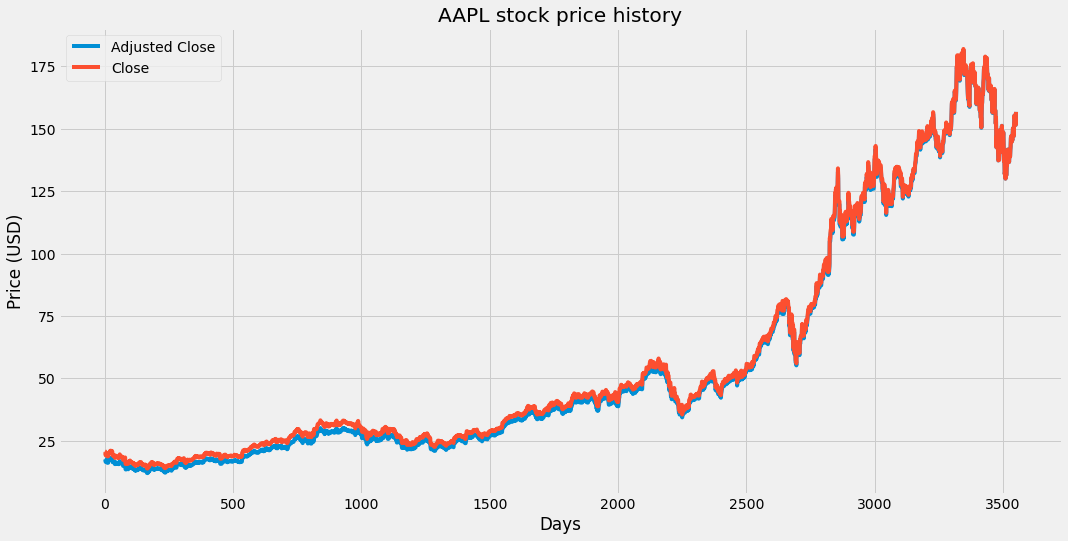

In [4]:
plt.figure(figsize = (16,8))
plt.plot(df["AAPL_AdjClose"])
plt.plot(df["AAPL_Close"])
plt.title('AAPL stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Adjusted Close','Close'], loc='upper left')
plt.show()

In [5]:
data = df.filter(['AAPL_Close'])
dataset = data.values
#Get number of rows to train the model on
training_data_len = math.ceil(len(dataset)* .8)

training_data_len

2842

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04124529],
       [0.04086914],
       [0.03558838],
       ...,
       [0.82708815],
       [0.81905547],
       [0.84993677]])

## Trying to predict using 60 days as timestep 

In [7]:
train_data = scaled_data[0:training_data_len  , : ]

x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()



[array([0.04124529, 0.04086914, 0.03558838, 0.03128513, 0.03326356,
       0.03326356, 0.03326356, 0.03236466, 0.03237954, 0.03110025,
       0.02870743, 0.0291452 , 0.0291452 , 0.0291452 , 0.03723105,
       0.03620676, 0.03637465, 0.03637465, 0.0384572 , 0.0384572 ,
       0.0384572 , 0.04228869, 0.04127929, 0.04088828, 0.04225256,
       0.04138554, 0.04138554, 0.04138554, 0.04157891, 0.0393816 ,
       0.03150614, 0.03330182, 0.03032886, 0.03032886, 0.03032886,
       0.02959996, 0.03205865, 0.03155076, 0.02957233, 0.02534346,
       0.02534346, 0.02534346, 0.02726451, 0.03046699, 0.02885406,
       0.02788079, 0.02737077, 0.02737077, 0.02737077, 0.02754927,
       0.02754927, 0.0260256 , 0.02646337, 0.02530096, 0.02530096,
       0.02530096, 0.03009934, 0.03009934, 0.03368219, 0.03220953])]
[0.029000688648637446]



In [8]:
# converting into numpy sequences to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('Number of rows and columns: ', x_train.shape)  

Number of rows and columns:  (2782, 60, 1)


In [9]:
x_train.shape

(2782, 60, 1)

In [10]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))



model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
87/87 [==============================] - 8s 40ms/step - loss: 6.6245e-04
Epoch 2/50
87/87 [==============================] - 3s 36ms/step - loss: 7.6515e-05
Epoch 3/50
87/87 [==============================] - 4s 41ms/step - loss: 8.5669e-05
Epoch 4/50
87/87 [==============================] - 3s 35ms/step - loss: 7.5291e-05
Epoch 5/50
87/87 [==============================] - 3s 37ms/step - loss: 7.0209e-05
Epoch 6/50
87/87 [==============================] - 3s 36ms/step - loss: 6.5801e-05
Epoch 7/50
87/87 [==============================] - 3s 35ms/step - loss: 6.4443e-05
Epoch 8/50
87/87 [==============================] - 3s 35ms/step - loss: 6.3099e-05
Epoch 9/50
87/87 [==============================] - 3s 34ms/step - loss: 6.3451e-05
Epoch 10/50
87/87 [==============================] - 3s 39ms/step - loss: 5.5581e-05
Epoch 11/50
87/87 [==============================] - 3s 37ms/step - loss: 5.4314e-05
Epoch 12/50
87/87 [==============================] - 3s 36ms/step - loss: 

In [11]:
# # We add the LSTM layer and later add a few Dropout layers to prevent overfitting.
# # Building a LTSM model with 50 neurons and 4 hidden layers. We add the LSTM layer with the following arguments:
# # 50 units which is the dimensionality of the output space
# # return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence input_shape as the shape of our training set.
# # When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.
# # Thereafter, we add the Dense layer that specifies the output of 1 unit.
# # After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error.

# model = Sequential()

# #Adding the first LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))

# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# # Adding the output layer
# model.add(Dense(units = 1))

# # Compiling the RNN
# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# # Fitting the RNN to the Training set
# model.fit(x_train, y_train, epochs = 50, batch_size = 32)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Getting the predicted stock price
test_data = scaled_data[training_data_len - 60: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

# Convert x_test to a numpy array
x_test = np.array(x_test)


In [14]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print('Number of rows and columns: ', x_test.shape)

Number of rows and columns:  (710, 60, 1)


In [15]:
# Making predictions using the test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
#Get rmse
#
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.3567257014573357

In [17]:
#Mean Absolute Percentage Error - subtract from 100 and this is the accuracy? So like 97% which is pretty good
mape = np.mean(np.absolute((y_test- predictions)/y_test))* 100
mape

1.142171050494351

<ipython-input-18-560c13bc2aae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


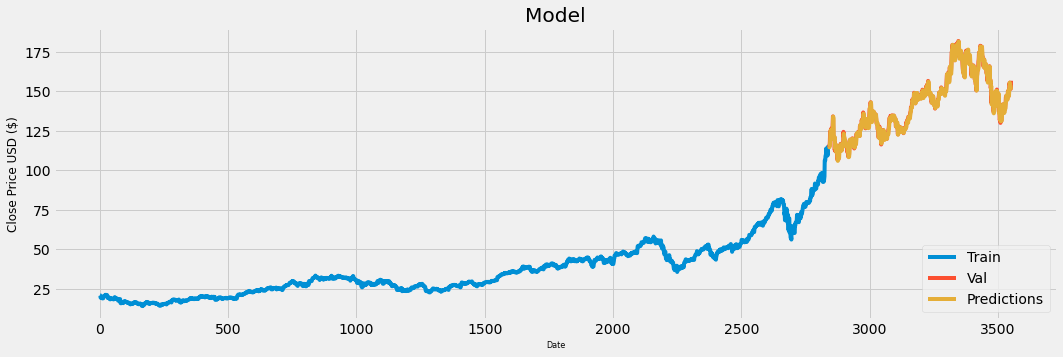

In [18]:
# Visualising the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,5))

plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['AAPL_Close'])
plt.plot(valid[['AAPL_Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
valid

,AAPL_Close,Predictions
2842,114.607498,114.989288
2843,115.562500,114.585472
2844,115.707497,115.252594
2845,118.275002,115.624680
2846,124.370003,117.857071
...,...,...
3547,154.089996,154.586609
3548,154.089996,153.939987
3549,152.949997,153.717621
3550,151.600006,152.618729


### PREDICTING CLOSING PRICE FOR NEXT DAY

In [35]:
#Try and predict closing price 
tsla_quote = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end = '2022-7-14')
new_df = tsla_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

ValueError: in user code:

    File "C:\Users\riama\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\riama\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\riama\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\riama\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\riama\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\riama\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 30, 1), found shape=(None, 60, 1)


In [21]:
#Actaul closing
tsla_quote_actual = web.DataReader('AAPL', data_source='yahoo', start = '2012-01-01', end = '2022-7-15')
print(tsla_quote_actual['Close'])

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
Name: Close, Length: 2003, dtype: float64


## Trying to predict using 30 days as timestep 

In [36]:
train_data = scaled_data[0:training_data_len  , : ]

x_train = []
y_train = []
for i in range(180, len(train_data)):
    x_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])
    if i<=180:
        print(x_train)
        print(y_train)
        print()



[array([0.04124529, 0.04086914, 0.03558838, 0.03128513, 0.03326356,
       0.03326356, 0.03326356, 0.03236466, 0.03237954, 0.03110025,
       0.02870743, 0.0291452 , 0.0291452 , 0.0291452 , 0.03723105,
       0.03620676, 0.03637465, 0.03637465, 0.0384572 , 0.0384572 ,
       0.0384572 , 0.04228869, 0.04127929, 0.04088828, 0.04225256,
       0.04138554, 0.04138554, 0.04138554, 0.04157891, 0.0393816 ,
       0.03150614, 0.03330182, 0.03032886, 0.03032886, 0.03032886,
       0.02959996, 0.03205865, 0.03155076, 0.02957233, 0.02534346,
       0.02534346, 0.02534346, 0.02726451, 0.03046699, 0.02885406,
       0.02788079, 0.02737077, 0.02737077, 0.02737077, 0.02754927,
       0.02754927, 0.0260256 , 0.02646337, 0.02530096, 0.02530096,
       0.02530096, 0.03009934, 0.03009934, 0.03368219, 0.03220953,
       0.02900069, 0.02900069, 0.02900069, 0.02834192, 0.02864155,
       0.02689688, 0.02825905, 0.02757691, 0.02757691, 0.02757691,
       0.02363492, 0.02027095, 0.02455719, 0.02383254, 0.0232

In [37]:
# converting into numpy sequences to train the LSTM model
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('Number of rows and columns: ', x_train.shape)  

Number of rows and columns:  (2662, 180, 1)


In [38]:
x_train.shape

(2662, 180, 1)

In [39]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
84/84 [==============================] - 25s 171ms/step - loss: 0.0013
Epoch 2/50
84/84 [==============================] - 16s 190ms/step - loss: 8.0501e-05
Epoch 3/50
84/84 [==============================] - 15s 180ms/step - loss: 9.5867e-05
Epoch 4/50
84/84 [==============================] - 15s 177ms/step - loss: 7.4675e-05
Epoch 5/50
84/84 [==============================] - 16s 185ms/step - loss: 7.3538e-05
Epoch 6/50
84/84 [==============================] - 14s 166ms/step - loss: 7.6638e-05
Epoch 7/50
84/84 [==============================] - 20s 234ms/step - loss: 7.0546e-05
Epoch 8/50
84/84 [==============================] - 15s 174ms/step - loss: 5.9972e-05
Epoch 9/50
84/84 [==============================] - 14s 170ms/step - loss: 5.6488e-05
Epoch 10/50
84/84 [==============================] - 15s 181ms/step - loss: 5.6982e-05
Epoch 11/50
84/84 [==============================] - 16s 194ms/step - loss: 6.5260e-05
Epoch 12/50
84/84 [==============================] - 18s

In [46]:
# Getting the predicted stock price
test_data = scaled_data[training_data_len - 180: , : ]

#Create the x_test and y_test data sets
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

# Convert x_test to a numpy array
x_test = np.array(x_test)


In [47]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print('Number of rows and columns: ', x_test.shape)

Number of rows and columns:  (710, 180, 1)


In [48]:
# Making predictions using the test dataset
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [49]:
#Get rmse
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

2.396970097507898

In [50]:
#Mean Absolute Percentage Error
mape = np.mean(np.absolute((y_test- predictions)/y_test))* 100
mape

1.186364020877183

<ipython-input-51-560c13bc2aae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


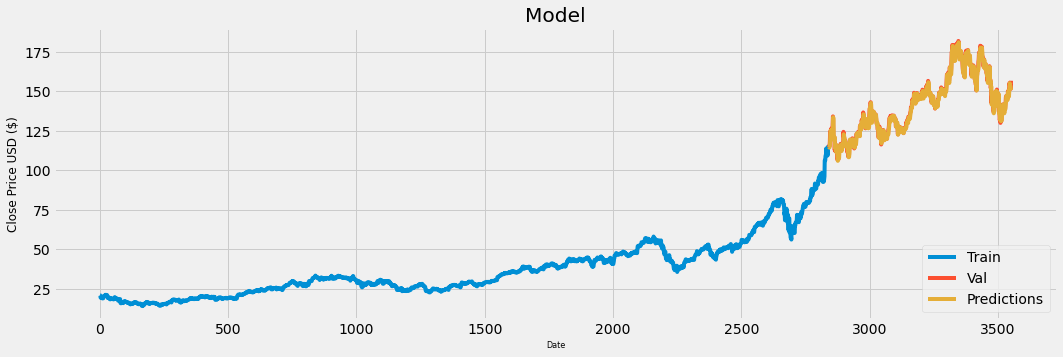

In [51]:
# Visualising the results
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,5))

plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['AAPL_Close'])
plt.plot(valid[['AAPL_Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [52]:
valid

,AAPL_Close,Predictions
2842,114.607498,114.749672
2843,115.562500,114.370560
2844,115.707497,115.014809
2845,118.275002,115.425819
2846,124.370003,117.594849
...,...,...
3547,154.089996,154.240189
3548,154.089996,153.511154
3549,152.949997,153.303558
3550,151.600006,152.265137


### Predicting next day price

In [33]:
#Try and predict closing price 
tsla_quote = web.DataReader('TSLA', data_source='yahoo', start = '2012-01-01', end = '2022-7-14')
new_df = tsla_quote.filter(['Close'])

#Get the last 30 day closing price values and convert the dataframe to an array
last_30_days = new_df[-30:].values
last_30_days_scaled = scaler.transform(last_30_days)

X_test = []
X_test.append(last_30_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[659.305]]


In [34]:
#Actaul closing
tsla_quote_actual = web.DataReader('TSLA', data_source='yahoo', start = '2012-01-01', end = '2022-7-15')
print(tsla_quote_actual['Close'])

Date
2012-01-03      5.616000
2012-01-04      5.542000
2012-01-05      5.424000
2012-01-06      5.382000
2012-01-09      5.450000
                 ...    
2022-07-11    703.030029
2022-07-12    699.210022
2022-07-13    711.119995
2022-07-14    714.940002
2022-07-15    720.200012
Name: Close, Length: 2651, dtype: float64
